# Kaggle Competition: Housing Prices

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

Here is the link to the Kaggle Competition I participated in! What follows is a complete data science project using machine learning, specifically Extreme Gradient Boosting to determine the prices of a house!

The dataset is available in the link, please check out this notebook!

In [1]:
# let's start by grabbing the housing data

In [2]:
import pandas as pd
house_df = pd.read_csv("train.csv")
final_kaggle_df = house_df.copy()

In [3]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
# we can see that there are all sorts of categorical and numerical data available to us!

In [6]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


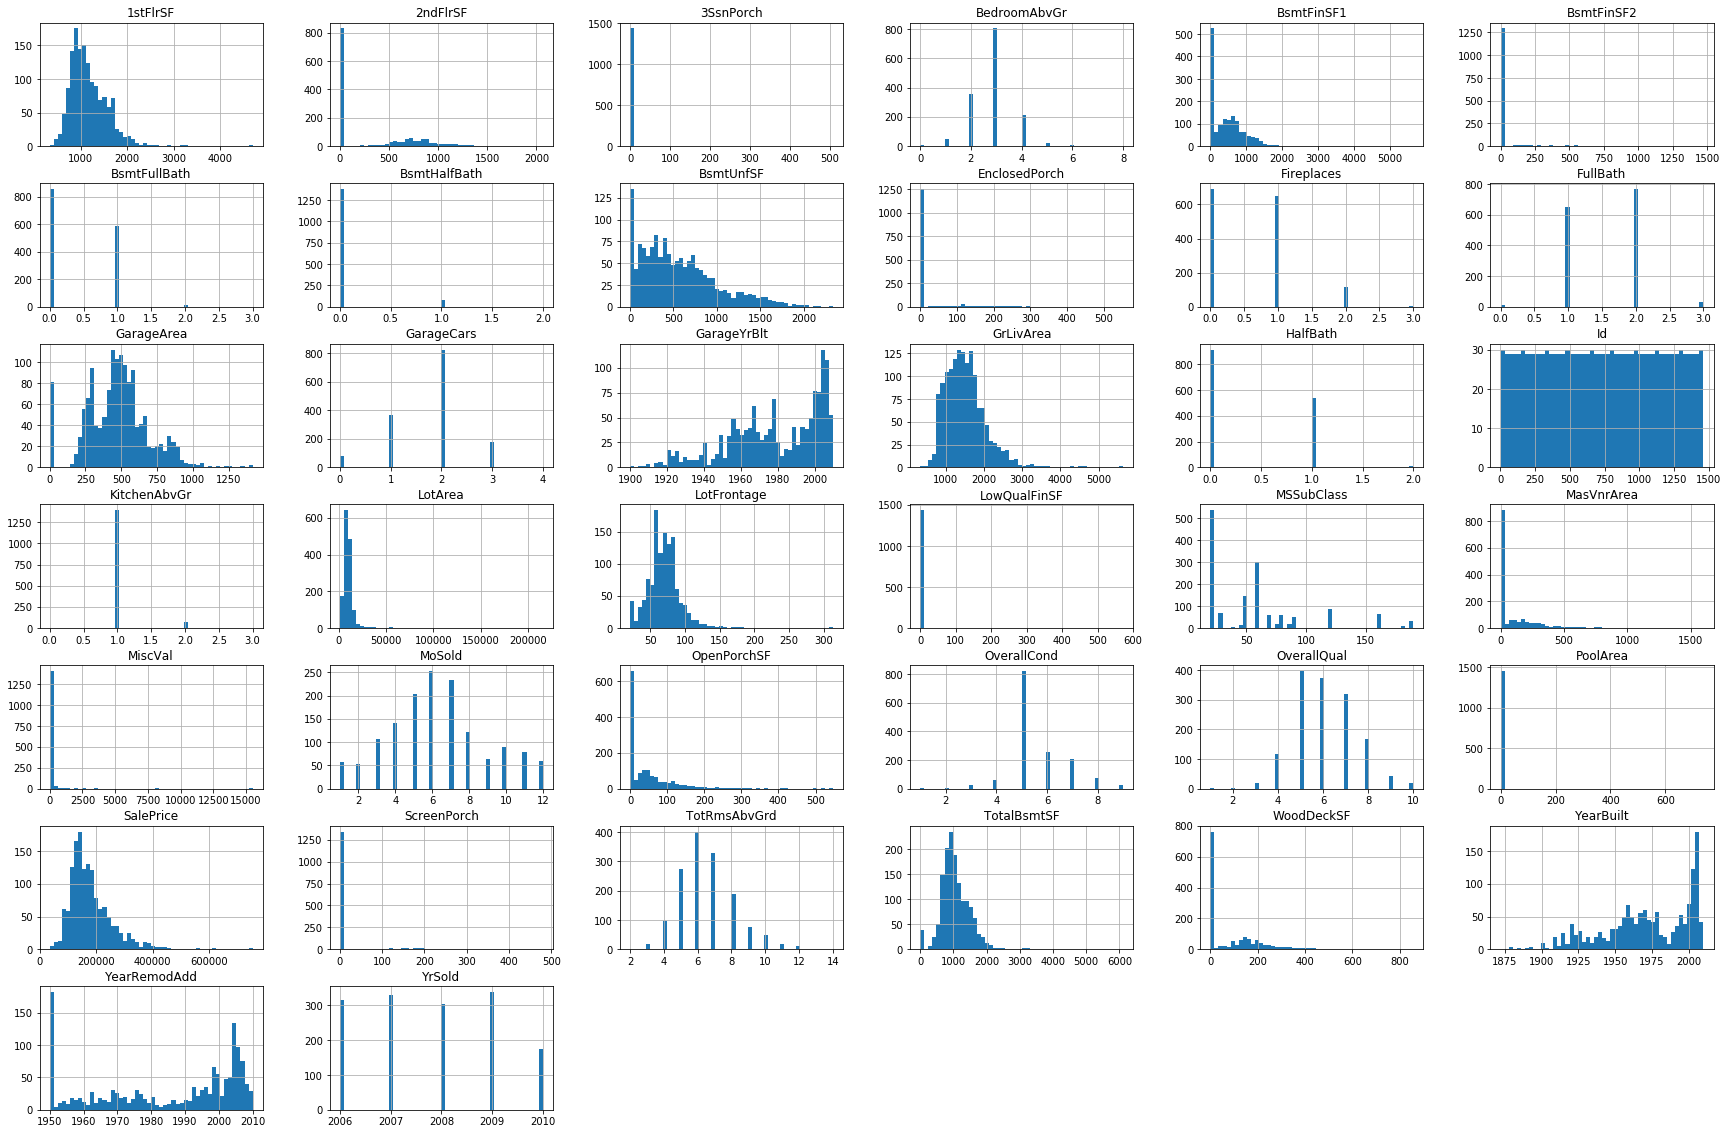

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
house_df.hist(bins = 50, figsize = (30,20))
plt.show()

In [8]:
# Here we are just looking at the distributions of the numerical data, trying
# to get a sense of what we are playing with here.

In [9]:
corr_matrix = house_df.corr()
corr_matrix['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028272122550>,
      dtype=object)

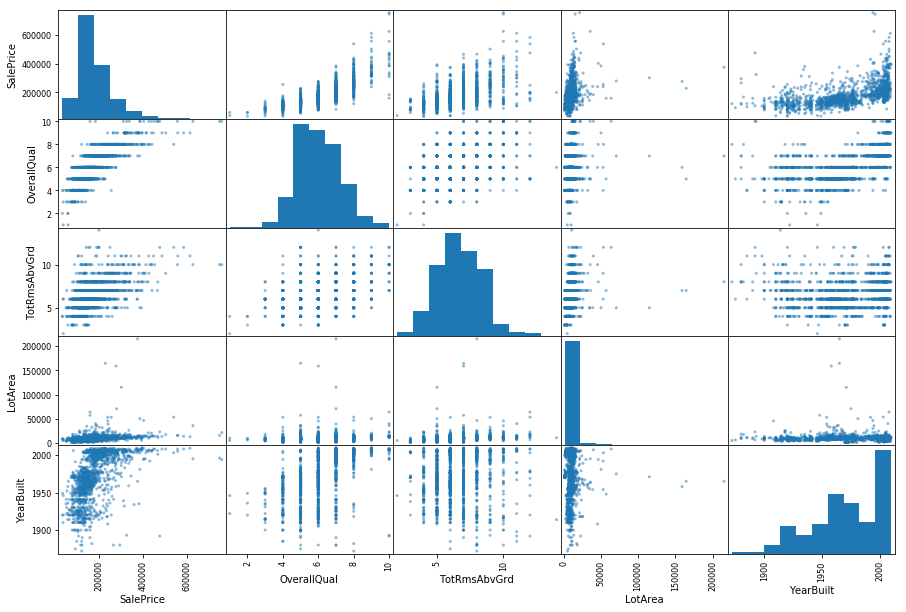

In [10]:
from pandas.plotting import scatter_matrix

attribs = ['SalePrice', 'OverallQual', 'TotRmsAbvGrd', 'LotArea', 'YearBuilt']
scatter_matrix(house_df[attribs], figsize = (15, 10))

In [11]:
# above we have computed the correlation matrix, and are trying to find
# what variables, from an intial glance, might have be able to explain
# the total Sale Price of the house

In [12]:
# we will split the relevant numeric and categorical data... 
# this way we will be able to build a data pipeline with their combined
# features along with some normalization along the way

# Train, Test, Split (or something close)

In [13]:
# Instead of the random train, test, split... I decided instead to use Stratified Sampling provided by sklearn
# The intuition being that when I am trying to find the best model.. I should have a representative sample from all
# of the neighborhoods!

In [14]:
from sklearn.preprocessing import LabelEncoder

lb_hood = LabelEncoder()
house_df["Neighborhood_Code"] = lb_hood.fit_transform(house_df["Neighborhood"])
house_df[["Neighborhood", "Neighborhood_Code"]].head(10)

,Neighborhood,Neighborhood_Code
0,CollgCr,5
1,Veenker,24
2,CollgCr,5
3,Crawfor,6
4,NoRidge,15
5,Mitchel,11
6,Somerst,21
7,NWAmes,14
8,OldTown,17
9,BrkSide,3


In [15]:
from sklearn.model_selection import StratifiedShuffleSplit as SSsplit

split = SSsplit(n_splits = 1, test_size = 0.2)
for train_index, test_index in split.split(house_df, house_df["Neighborhood_Code"]):
    strat_train_set = house_df.loc[train_index]
    strat_test_set = house_df.loc[test_index]

In [16]:
# We need to drop that Neighborhood Code column.. we will be using the OneHotEncoder to encapsulate this variable later in our
# code

In [17]:
for value in (strat_train_set, strat_test_set):
    value.drop("Neighborhood_Code", axis = 1, inplace = True)

# Creating our Data Pipeline

In [18]:
salePrice_df = strat_train_set["SalePrice"].copy()
house_df = strat_train_set.drop("SalePrice", axis = 1)


In [19]:
# we will grab all of the numerical features first.. ensure that we have a working pipeline for them to clean and normalize them.
# next we will combine that pipeline with one for our categorical features

In [20]:
house_numerical = house_df[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'GrLivArea',
                           'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'BsmtFinSF1',
                           'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath',
                           'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
                           'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'YrSold']]

In [21]:
house_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 684 to 777
Data columns (total 24 columns):
LotFrontage      955 non-null float64
LotArea          1168 non-null int64
OverallQual      1168 non-null int64
OverallCond      1168 non-null int64
GrLivArea        1168 non-null int64
YearBuilt        1168 non-null int64
YearRemodAdd     1168 non-null int64
Fireplaces       1168 non-null int64
BsmtFinSF1       1168 non-null int64
TotalBsmtSF      1168 non-null int64
1stFlrSF         1168 non-null int64
2ndFlrSF         1168 non-null int64
FullBath         1168 non-null int64
HalfBath         1168 non-null int64
BedroomAbvGr     1168 non-null int64
KitchenAbvGr     1168 non-null int64
TotRmsAbvGrd     1168 non-null int64
GarageCars       1168 non-null int64
GarageArea       1168 non-null int64
GarageYrBlt      1107 non-null float64
WoodDeckSF       1168 non-null int64
OpenPorchSF      1168 non-null int64
EnclosedPorch    1168 non-null int64
YrSold           1168 non-null int64
d

In [22]:
# above you can see that all of our numerical data is now organized into one
# dataframe.. 

In [23]:
# below is just exploring the outputs of the Imputer.. the pipeline will handly all of this implicitly in our code

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(house_numerical)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [25]:
imputer.statistics_

array([6.900e+01, 9.375e+03, 6.000e+00, 5.000e+00, 1.456e+03, 1.972e+03,
       1.993e+03, 1.000e+00, 3.780e+02, 9.915e+02, 1.086e+03, 0.000e+00,
       2.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 6.000e+00, 2.000e+00,
       4.780e+02, 1.980e+03, 0.000e+00, 2.400e+01, 0.000e+00, 2.008e+03])

In [26]:
X = imputer.transform(house_numerical)

In [27]:
housing_tr = pd.DataFrame(X, columns = house_numerical.columns, 
                          index = house_numerical.index)

In [28]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 684 to 777
Data columns (total 24 columns):
LotFrontage      1168 non-null float64
LotArea          1168 non-null float64
OverallQual      1168 non-null float64
OverallCond      1168 non-null float64
GrLivArea        1168 non-null float64
YearBuilt        1168 non-null float64
YearRemodAdd     1168 non-null float64
Fireplaces       1168 non-null float64
BsmtFinSF1       1168 non-null float64
TotalBsmtSF      1168 non-null float64
1stFlrSF         1168 non-null float64
2ndFlrSF         1168 non-null float64
FullBath         1168 non-null float64
HalfBath         1168 non-null float64
BedroomAbvGr     1168 non-null float64
KitchenAbvGr     1168 non-null float64
TotRmsAbvGrd     1168 non-null float64
GarageCars       1168 non-null float64
GarageArea       1168 non-null float64
GarageYrBlt      1168 non-null float64
WoodDeckSF       1168 non-null float64
OpenPorchSF      1168 non-null float64
EnclosedPorch    1168 non-null flo

In [29]:
# we can see that the imputer is working correctly, filling in all of the
# missing numerical values with that categories median value
# it still must be normalized to aid the Gradient Descent algorithms
# that these ML models will be using

In [30]:
neighborhood_cat = house_df[['Neighborhood']]
neighborhood_cat.head(5)

,Neighborhood
684,NoRidge
802,CollgCr
60,SawyerW
934,NAmes
623,Somerst


In [31]:
# lets put some dummy attributes onto this neighborhood and see how we do...
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_hood_cat_1hot = cat_encoder.fit_transform(neighborhood_cat)
housing_hood_cat_1hot

<1168x25 sparse matrix of type '<class 'numpy.float64'>'
	with 1168 stored elements in Compressed Sparse Row format>

In [32]:
# this is how the OneHotEncoder will work... by placing dummy attributes for
# the attribute in question so we are not looking at scalar values for
# categories... because they are so computationally expensive... we
# will only select a few categories from the provided training set in our

In [33]:
# now we will create the pipeline for the numericals!! we will combine with
# the categorical soon
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(house_numerical)

In [34]:
housing_num_tr

array([[-0.51625341,  0.64527407,  0.6366558 , ...,  0.4992359 ,
        -0.35505135,  1.6515797 ],
       [-0.29599334, -0.22645959,  0.6366558 , ..., -0.42479505,
        -0.35505135,  0.14333491],
       [-0.29599334,  0.2691603 , -0.08111831, ...,  0.044554  ,
        -0.35505135, -1.36490989],
       ...,
       [-0.25194132, -0.30711352,  0.6366558 , ...,  0.10322264,
        -0.35505135, -1.36490989],
       [-1.66160582, -0.60267506, -0.08111831, ...,  2.93398412,
        -0.35505135,  0.89745731],
       [ 1.33393124,  0.29743495, -0.79889242, ..., -0.68880389,
        -0.35505135, -1.36490989]])

In [35]:
# now we will add our categorical data to this!!

In [36]:
# right now the data set has an NaN value for those homes without
# a garage or a basement... as a result, I am fillign those with my own
# string so the pipeline can work as intended

In [37]:
house_df["BsmtQual"] = house_df["BsmtQual"].fillna(value = "noB")
house_df["GarageQual"] = house_df["GarageQual"].fillna(value = "noG")

In [38]:
from sklearn.compose import ColumnTransformer

num_attribs = list(house_numerical)
cat_attribs = ["Neighborhood"]
# cat_attribs = ["Neighborhood", "Condition1", "Condition2", "BldgType",
#               "HouseStyle", "Exterior1st", "ExterQual", "BsmtQual", "HeatingQC",
#                "CentralAir","KitchenQual", "GarageQual"]

full_pipeline = ColumnTransformer([
        ("numerical", num_pipeline, num_attribs),
        ("categories", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(house_df)

In [39]:
len(housing_prepared)

1168

# Let's Train Some Models

Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, salePrice_df)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
# the method below will allow us to quickly compute the RMSE, which is what we are interested in minimizing for this
# kaggle competition!

In [42]:
from sklearn.metrics import mean_squared_error
import numpy as np
def compute_RMSE(predictions, actuals):
    mse = mean_squared_error(actuals, predictions)
    rmse = np.sqrt(mse)
    return rmse

In [43]:
predictions = lin_reg.predict(housing_prepared)
print("Linear Regression RMSE", compute_RMSE(predictions, salePrice_df))

Linear Regression RMSE 33286.12785876848


Random Forest!

In [44]:
# there is the RMSE for the most basic model! What
# about a RandomForestRegression model?

In [45]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, salePrice_df)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
predictions = forest_reg.predict(housing_prepared)
print("Random Forest RMSE: ", compute_RMSE(predictions, salePrice_df))

Random Forest RMSE:  11135.981106191695


In [47]:
# we can see that the Random Forest works much better on the sample!

XgBOoost

In [48]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(housing_prepared, salePrice_df)

[17:19:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [49]:
predictions = xg_reg.predict(housing_prepared)
print("XGBoost RMSE: ", compute_RMSE(predictions, salePrice_df))

XGBoost RMSE:  77059.876255219


# Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score

def cross_validation(model, data, labels, 
                     score_method = "neg_mean_squared_error", cvNum = 10):
    scores = cross_val_score(model, data, labels, scoring = score_method, cv = cvNum)
    rmse_scores = np.sqrt(-scores)
    return rmse_scores
    

In [51]:
def display_scores(scores, name):
    print("RESULTS FOR ", name.upper(), ":")
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())
    print("END OF RESULTS")

In [52]:
display_scores(cross_validation(lin_reg, housing_prepared,
                                salePrice_df), "Linear Regression")

RESULTS FOR  LINEAR REGRESSION :
Scores: [25839.89219246 42042.77621638 20898.15718353 25025.23469044
 42714.45287116 64218.7514918  25061.31391702 41692.40335894
 31921.82514333 37869.24549646]
Mean:  35728.40525615147
Standard Deviation:  12251.865732581371
END OF RESULTS


In [53]:
display_scores(cross_validation(forest_reg, housing_prepared,
                                salePrice_df), "Random Forest Regression")

RESULTS FOR  RANDOM FOREST REGRESSION :
Scores: [25559.61450864 45828.46171721 23046.35987519 22264.56429929
 33594.45842297 34141.39398258 23967.04368832 32965.84947584
 27792.56820821 27946.13575996]
Mean:  29710.644993821566
Standard Deviation:  6796.802562909234
END OF RESULTS


In [54]:
display_scores(cross_validation(xg_reg, housing_prepared,
                                salePrice_df), "XGBoost")

[17:19:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:16

In [55]:
# we are seeing that the xgboost is doing the best job! 

In [56]:
# maybe we should fine tune our model before we submit to kaggle!!

# GridSearch CV and fine tuning our Hyperparameters!

In [57]:
params_grid = {
    'max_depth': [1,2,3],
    'n_estimators': [5,10,25,50],
    'learning_rate':np.linspace(1e-16, 1, 3)
}

In [58]:
params_fixed = {'objective': 'reg:linear', 'silent': 1}

In [59]:
from sklearn.model_selection import GridSearchCV

bst_grid = GridSearchCV(
    estimator = xgb.XGBRegressor(**params_fixed),
    param_grid = params_grid,
    cv = 5,
    scoring = 'neg_root_mean_squared_error'
)

In [60]:
bst_grid.fit(housing_prepared, salePrice_df)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, silent=1,
                                    subsample=None, tree_method=None,
                                    validate_parameters=False, verbosity=None),
    

In [61]:
bst_grid.best_estimator_

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.5, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, silent=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [62]:
display_scores(cross_validation(bst_grid, housing_prepared,
                                salePrice_df), "Grid Search XGBoost")

RESULTS FOR  GRID SEARCH XGBOOST :
Scores: [25664.73066456 45325.34552647 26023.63302943 24497.72859145
 30297.17036365 32307.63188823 22724.95139974 35016.49956329
 24067.7039411  30648.37620705]
Mean:  29657.37711749645
Standard Deviation:  6462.901512911622
END OF RESULTS


# Making the Final Model

In [63]:
# remember in the beginning we made a copy of the full dataset!! we will now train our model on the full dataset
# to get the most learning that we can!

In [64]:
kaggle_labels = final_kaggle_df["SalePrice"].copy()
train_examples = final_kaggle_df.drop("SalePrice", axis = 1)
kaggle_prepared = full_pipeline.fit_transform(train_examples)

In [65]:
params_grid = {
    'max_depth': [1,2,3],
    'n_estimators': [5,10,25,50],
    'learning_rate':np.linspace(1e-16, 1, 3)
}

In [66]:
params_fixed = {'objective': 'reg:linear', 'silent': 1 }

In [67]:
from sklearn.model_selection import GridSearchCV

bst_grid = GridSearchCV(
    estimator = xgb.XGBRegressor(**params_fixed),
    param_grid = params_grid,
    cv = 5,
    scoring = 'neg_root_mean_squared_error'
)

In [68]:
bst_grid.fit(kaggle_prepared, kaggle_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, silent=1,
                                    subsample=None, tree_method=None,
                                    validate_parameters=False, verbosity=None),
    

In [69]:
final_model = bst_grid.best_estimator_

In [70]:
# this is actually our final model!! let's test our model!!

In [71]:
test_df = pd.read_csv("test.csv")
id_array = list(test_df['Id'])

In [72]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Predict and Submit

In [73]:
# here we are getting our final predictions!
test_prepared = full_pipeline.transform(test_df)
predictions = final_model.predict(test_prepared)

In [74]:
# NOW WE NEED TO EXPORT THOSE PREDICTIONS TO A CSV FILE TO SUBMIT TO KAGGLE!

In [78]:
import csv

with open('kaggle.csv', mode = 'w', newline = '') as kaggle_file:
    kaggle_writer = csv.writer(kaggle_file, delimiter = ',')
    kaggle_writer.writerow(['Id', 'SalePrice'])
    
    for i in range(len(id_array)):
        kaggle_writer.writerow([id_array[i], predictions[i]])
    

In [79]:
# DONE!!! 